<a href="https://colab.research.google.com/github/Mansouraran/AI-projects/blob/main/imgclassification_cifar10_myself.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.utils import to_categorical
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() # x is orginal img, y is label, (if you stand on the center prantese you see labes in dataset)

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train.shape[1:] # from dimention 2

(32, 32, 3)

In [ ]:
y_train[0]

array([6], dtype=uint8)

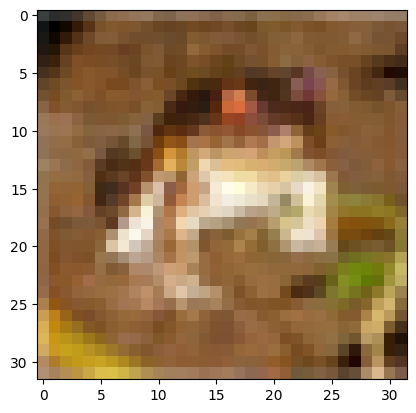

In [ ]:
plt.imshow(x_train[0])

In [ ]:
# Normalize the inputs from 0-255 to between 0 and 1 by dividing by 255
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
# One-hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
num_class = y_test.shape[1] # 10

# **Building the Model**

In [ ]:

model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=x_train.shape[1:], activation='relu')) # 32 kernal or filter
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same', activation='relu')) # 64 kernal or filter
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same', activation='relu')) # 64 kernal or filter
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same', activation='relu')) # 128 kernal or filter
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(num_class, activation = 'softmax'))

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics= ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

## **Training The Model**

In [ ]:
history = model.fit(x_train, y_train, epochs= 30, batch_size= 64, validation_data= (x_test, y_test))

Epoch 1/30
782/782 [==============================] - 20s 14ms/step - loss: 1.4856 - accuracy: 0.4690 - val_loss: 1.2040 - val_accuracy: 0.5613
Epoch 2/30
782/782 [==============================] - 10s 13ms/step - loss: 1.0702 - accuracy: 0.6244 - val_loss: 0.8905 - val_accuracy: 0.6837
Epoch 3/30
782/782 [==============================] - 10s 13ms/step - loss: 0.9231 - accuracy: 0.6787 - val_loss: 0.8146 - val_accuracy: 0.7183
Epoch 4/30
782/782 [==============================] - 9s 12ms/step - loss: 0.8322 - accuracy: 0.7104 - val_loss: 0.7686 - val_accuracy: 0.7263
Epoch 5/30
782/782 [==============================] - 10s 13ms/step - loss: 0.7672 - accuracy: 0.7342 - val_loss: 0.7055 - val_accuracy: 0.7601
Epoch 6/30
782/782 [==============================] - 10s 13ms/step - loss: 0.7134 - accuracy: 0.7511 - val_loss: 0.6537 - val_accuracy: 0.7741
Epoch 7/30
782/782 [==============================] - 10s 13ms/step - loss: 0.6694 - accuracy: 0.7667 - val_loss: 0.6216 - val_accuracy: 

In [ ]:
type(history.history)

dict

In [ ]:
for key, val in history.history.items():
  print(key)

loss
accuracy
val_loss
val_accuracy


<Axes: >

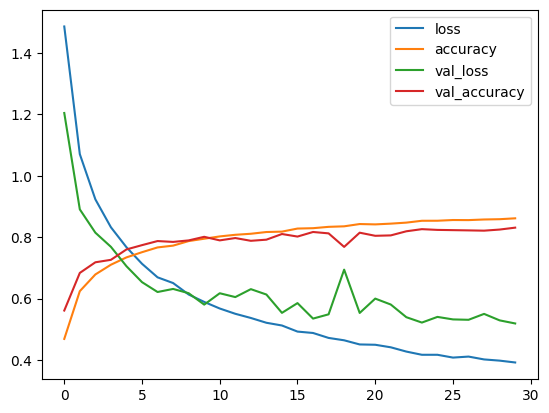

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()


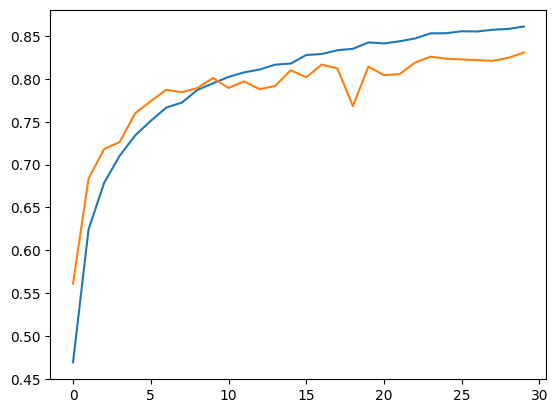

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [ ]:
model.save('CNN_cifar10.h5') # save the model

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model2 = load_model('CNN_cifar10.h5')

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
model2.predict(x_test[0:10])[0]

1/1 [==============================] - 0s 358ms/step


array([3.8512673e-05, 6.2310378e-06, 4.7331028e-05, 8.8437146e-01,
       1.5543670e-06, 1.1516544e-01, 3.4096270e-04, 8.1644730e-06,
       1.6638189e-05, 3.8146168e-06], dtype=float32)

In [ ]:
labels[3] # we test label 3 that is true

'cat'

In [ ]:
y_test[0] # we test y that is true

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

313/313 [==============================] - 1s 2ms/step


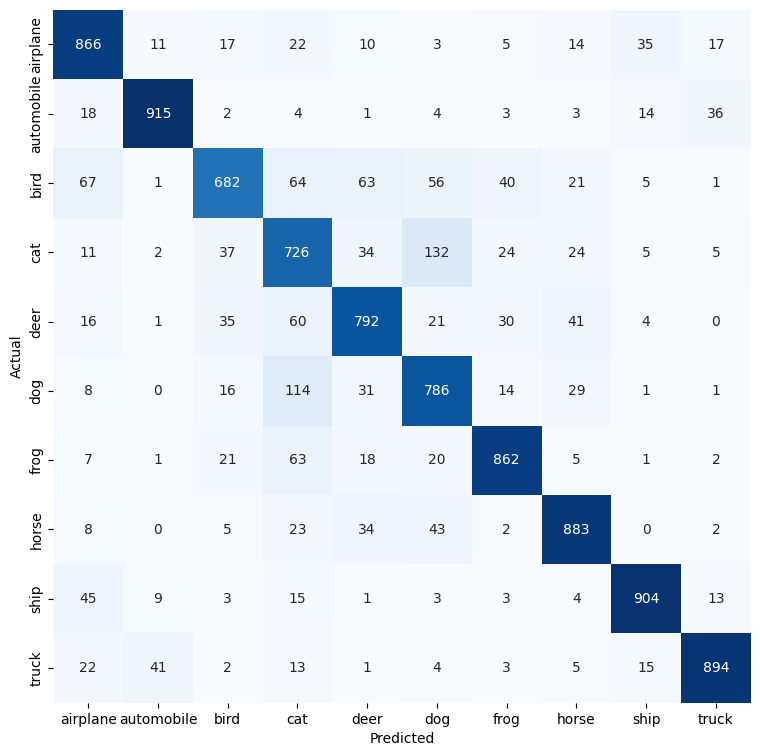

In [ ]:
# Predicting test data
predictions = model.predict(x_test)

predictions = np.argmax(predictions, axis = 1)

#y_test = np.argmax(y_test, axis = 1)


# Creating confusion matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

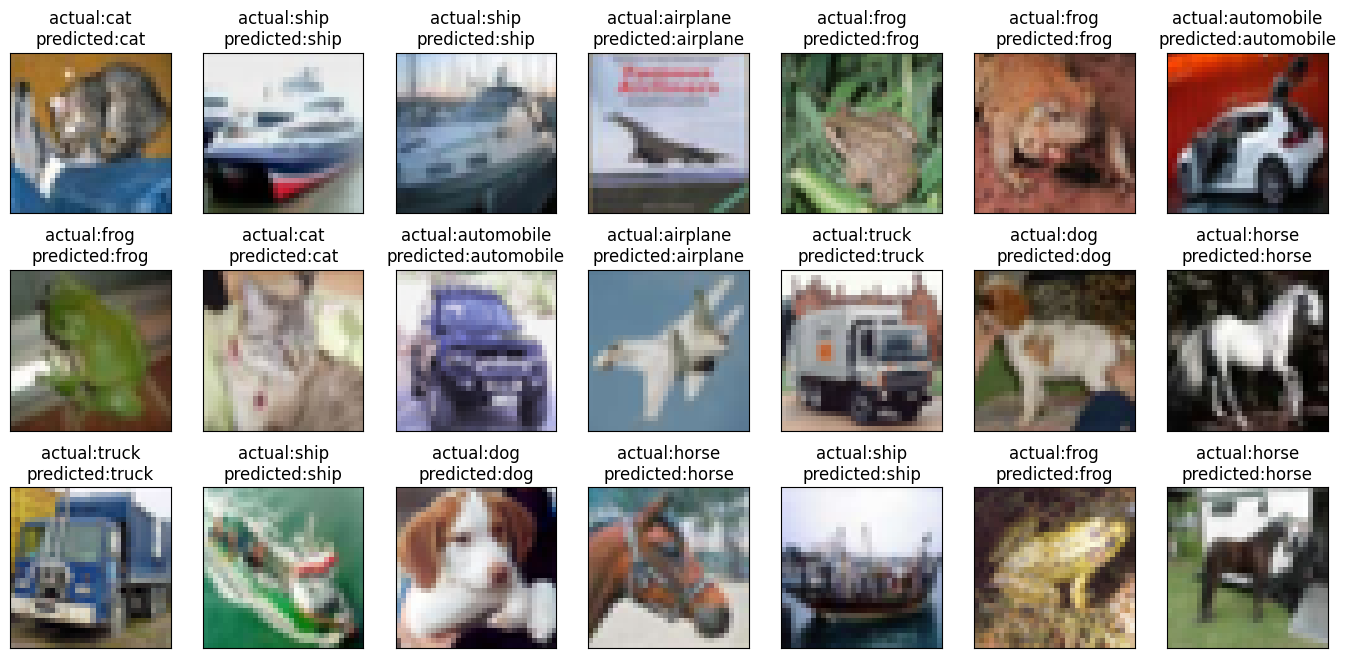

In [ ]:
y_test = y_test.astype(int)
predictions = predictions.astype(int)

fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + labels[y_test[index]] + '\n' + 'predicted:' + labels[predictions[index]])
        axes[i,j].imshow(x_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()
